# Card Catalog Spatial Frequencies

Installing geopandas on conda prompt: https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b run activate geo_env, jupyter notebook on conda prompt

Creating heatmaps in geopandas: https://medium.com/@m_vemuri/create-a-geographic-heat-map-of-the-city-of-toronto-in-python-cd2ae0f8be55

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
# Read shapefile and load in card catalog dataset
usa = gpd.read_file('tl_2020_us_state/tl_2020_us_state.shp')

df = pd.read_csv('C:/Users/heidi/Desktop/rl/Data--Rubenstein-Library-Card-Catalog/all_sorted_collection.csv')

# Sort alphabetically
usa = usa.sort_values(by=['STATEFP'])

In [44]:
# Store names and counts
# State Name	USPS Abbreviation	Traditional Abbreviation

states = {
"Alabama-AL-Ala.": 0,
"Alaska-AK-Alaska": 0,
"Arizona-AZ-Ariz.": 0,
"Arkansas-AR-Ark.": 0,
"California-CA-Calif.": 0,
"Colorado-CO-Colo.": 0,
"Connecticut-CT-Conn.": 0,
"Delaware-DE-Del.": 0,
"District of Columbia-DC-D.C.": 0,
"Florida-FL-Fla.": 0,
"Georgia-GA-Ga.": 0,
"Hawaii-HI-Hawaii": 0,
"Idaho-ID-Idaho": 0,
"Illinois-IL-Ill.": 0,
"Indiana-IN-Ind.": 0,
"Iowa-IA-Iowa": 0,
"Kansas-KS-Kans.": 0,
"Kentucky-KY-Ky.": 0,
"Louisiana-LA-La.": 0,
"Maine-ME-Maine": 0,
"Maryland-MD-Md.": 0,
"Massachusetts-MA-Mass.": 0,
"Michigan-MI-Mich.": 0,
"Minnesota-MN-Minn.": 0,
"Mississippi-MS-Miss.": 0,
"Missouri-MO-Mo.": 0,
"Montana-MT-Mont.": 0,
"Nebraska-NE-Neb. or Nebr.": 0,
"Nevada-NV-Nev.": 0,
"New Hampshire-NH-N.H.": 0,
"New Jersey-NJ-N.J.": 0,
"New Mexico-NM-N.Mex.": 0,
"New York-NY-N.Y.": 0,
"North Carolina-NC-N.C.": 0,
"North Dakota-ND-N.Dak.": 0,
"Ohio-OH-Ohio": 0,
"Oklahoma-OK-Okla.": 0,
"Oregon-OR-Ore.-Oreg.": 0,
"Pennsylvania-PA-Pa.": 0,
"Rhode Island-RI-R.I.": 0,
"South Carolina-SC-S.C.": 0,
"South Dakota-SD-S.Dak.": 0,
"Tennessee-TN-Tenn.": 0,
"Texas-TX-Tex. or Texas": 0,
"Utah-UT-Utah": 0,
"Vermont-VT-Vt.": 0,
"Virginia-VA-Va.": 0,
"Washington-WA-Wash.": 0,
"West Virginia-WV-W.Va.": 0,
"Wisconsin-WI-Wis. or Wisc.": 0,
"Wyoming-WY-Wyo.": 0,
"American Samoa-AS-Amer. Samoa": 0,
"Guam-GU-Guam": 0,
"Northern Mariana Islands-MP-M.P.": 0,
"Puerto Rico-PR-P.R.": 0,
"Virgin Islands-VI-V.I.": 0,
}

In [45]:
# Add state counts from catalog dataset
# Function to check if location is a state and add to counts
def find_state(s):
    # Check in list of states
    s = s.strip()
    if len(s) > 1:
        for key in states:
            if (s + "-") in key or ("-" + s) in key:
                states[key] = states.get(key) + 1
                break
    
# Loop through each main entry and try to gather location
for index, row in df.iterrows():
    if row['Coll_head'] == 1:
        # Try to get state name or abbreviation
        locs = str(row['Loc']).split(",")
        if len(locs) < 1:
            continue
        elif len(locs) == 1:
            find_state(locs[0])
        elif len(locs) == 2:
            find_state(locs[1])
            for i in range(2, len(locs)):
                find_state(locs[i])
            
print(states)

{'Alabama-AL-Ala.': 151, 'Alaska-AK-Alaska': 0, 'Arizona-AZ-Ariz.': 1, 'Arkansas-AR-Ark.': 16, 'California-CA-Calif.': 11, 'Colorado-CO-Colo.': 3, 'Connecticut-CT-Conn.': 76, 'Delaware-DE-Del.': 5, 'District of Columbia-DC-D.C.': 43, 'Florida-FL-Fla.': 17, 'Georgia-GA-Ga.': 364, 'Hawaii-HI-Hawaii': 1, 'Idaho-ID-Idaho': 0, 'Illinois-IL-Ill.': 25, 'Indiana-IN-Ind.': 21, 'Iowa-IA-Iowa': 13, 'Kansas-KS-Kans.': 2, 'Kentucky-KY-Ky.': 52, 'Louisiana-LA-La.': 71, 'Maine-ME-Maine': 11, 'Maryland-MD-Md.': 217, 'Massachusetts-MA-Mass.': 167, 'Michigan-MI-Mich.': 12, 'Minnesota-MN-Minn.': 3, 'Mississippi-MS-Miss.': 62, 'Missouri-MO-Mo.': 33, 'Montana-MT-Mont.': 0, 'Nebraska-NE-Neb. or Nebr.': 2, 'Nevada-NV-Nev.': 0, 'New Hampshire-NH-N.H.': 22, 'New Jersey-NJ-N.J.': 17, 'New Mexico-NM-N.Mex.': 6, 'New York-NY-N.Y.': 299, 'North Carolina-NC-N.C.': 1179, 'North Dakota-ND-N.Dak.': 1, 'Ohio-OH-Ohio': 62, 'Oklahoma-OK-Okla.': 3, 'Oregon-OR-Ore.-Oreg.': 2, 'Pennsylvania-PA-Pa.': 190, 'Rhode Island-RI-R.

In [29]:
# Add state counts to geo dataframe
vals = states.values()
usa['Count'] = vals

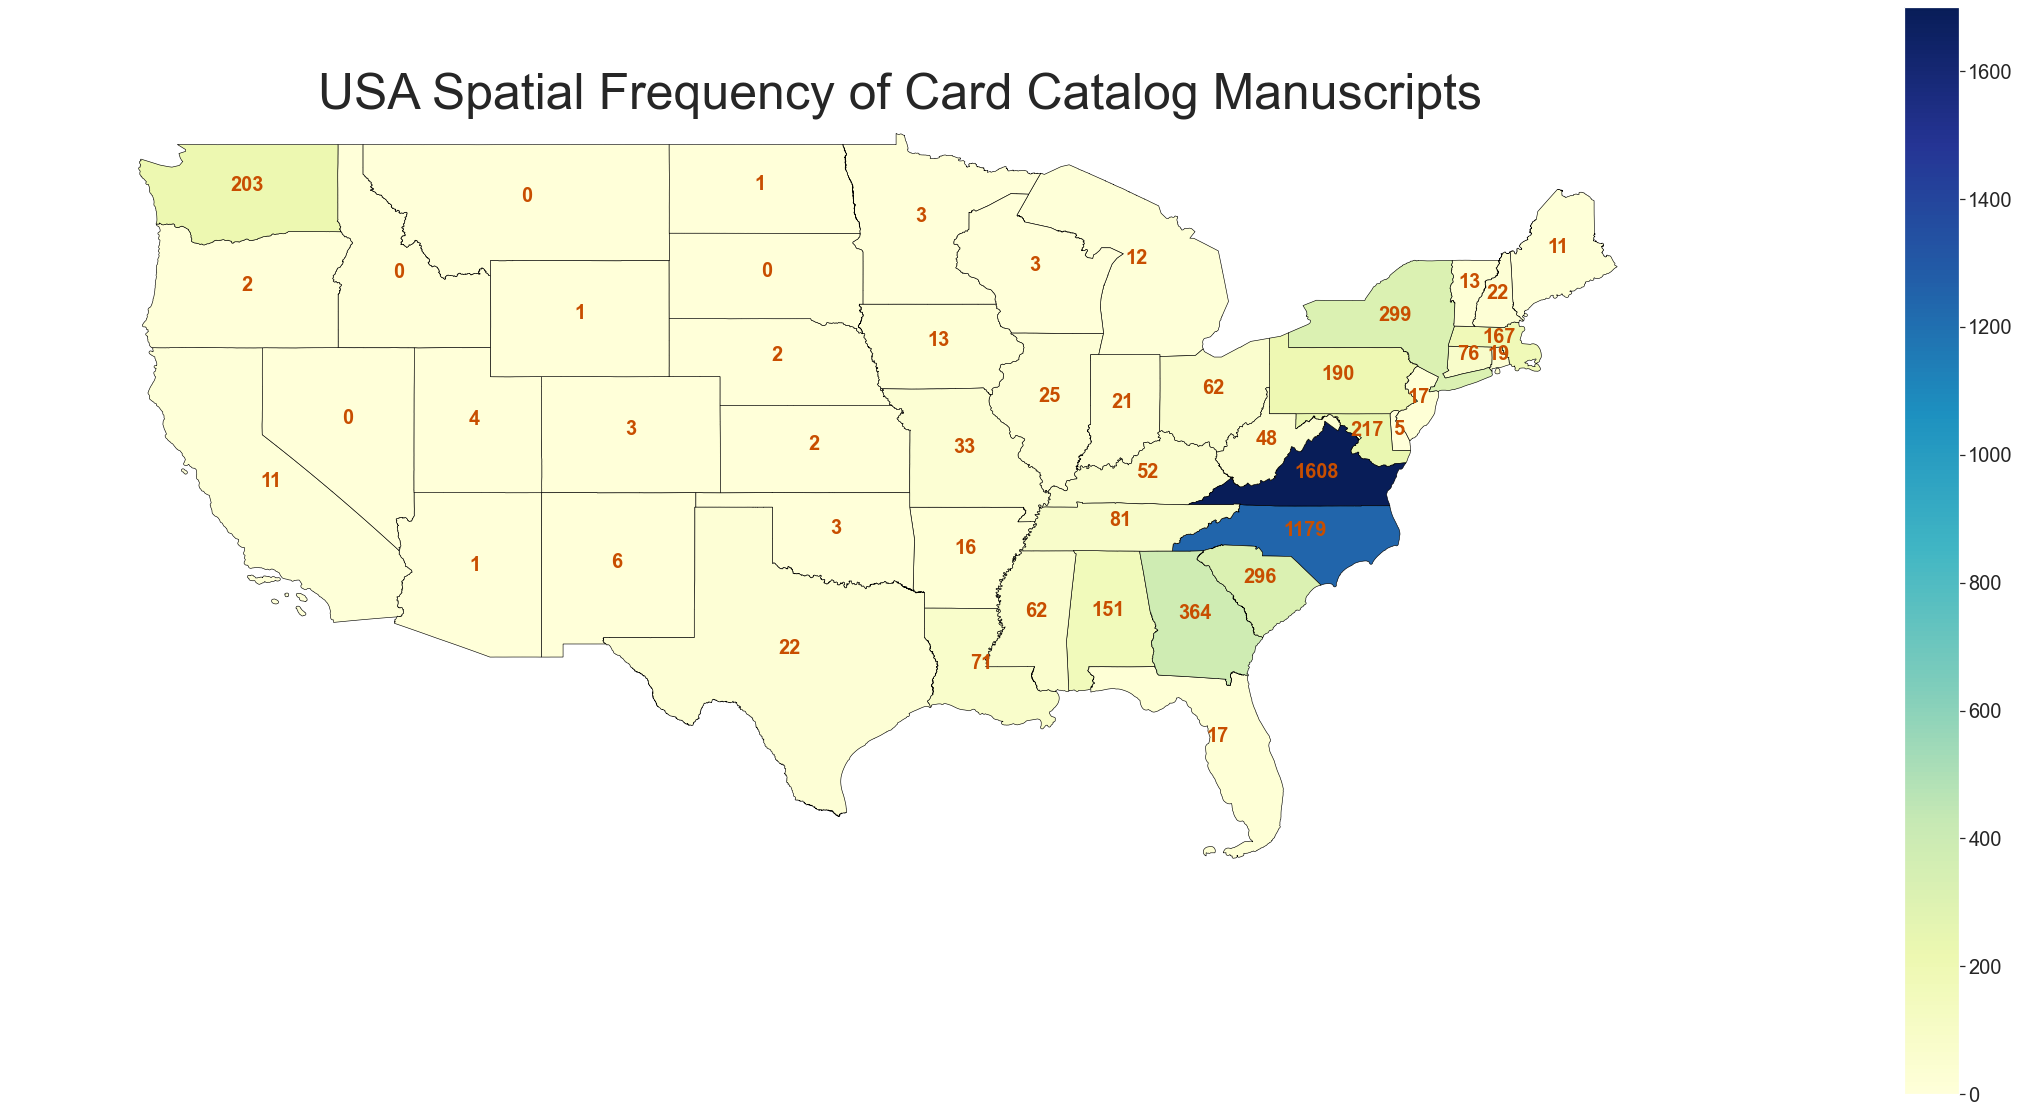

In [35]:
# Print initial heatmap---code adapted from article linked above
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title("USA Spatial Frequency of Card Catalog Manuscripts", fontdict={'fontsize': '50', 'fontweight' : '3'})

color = 'YlGnBu'
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=0, vmax=1700))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
plt.xlim([-130, -60])
plt.ylim([20, 50])

usa.plot('Count', cmap=color, linewidth=0.6, ax=ax, edgecolor="black", figsize=(40, 20))

# Add quantity labels, code adapted from https://stackoverflow.com/questions/38899190/geopandas-label-polygons
usa_nums = usa.copy()
usa_nums['coords'] = usa_nums['geometry'].apply(lambda x: x.centroid.coords[:])
usa_nums['coords'] = [coords[0] for coords in usa_nums['coords']]
# Remove DC to avoid label clashes
usa_nums.drop(usa_nums.index[8], inplace = True)

for index, row in usa_nums.iterrows():
    plt.annotate(text=row['Count'], xy=row['coords'], horizontalalignment='center', color='#C84E00', 
                 fontsize=20, fontweight='bold')

Based on the heat map, we can see that the states with the most hits are Virginia and North Carolina. New York, South Carolina, and Georgia are also decently common. Washington is also up there, although this may be false hits for the name "Washington" instead of the location. Alaska does not have any cards, so it was omitted from the map. Outside of the continental US, Hawaii and Puerto Rico have one hit each. There are some odd outliers here e.g., why is North Carolina not the most represented state? Perhaps NC originating cards were labeled with county instead of state, let's check it out.

## Spatial Frequency Map by N.C. County

In [36]:
# Read in NC county shapefile
nc = gpd.read_file('nc_counties/nc_covid.shp')
nc.drop(['cases', 'deaths', 'case100', 'death100'], axis=1, inplace=True)

In [37]:
# Dictionary of NC county names

counties = {
    "Alamance County": 0,
    "Alexander County": 0,
    "Alexander County": 0,
    "Alleghany County": 0,
    "Anson County": 0,
    "Ashe County": 0,
    "Avery County": 0,
    "Beaufort County": 0,
    "Bertie County": 0,
    "Bladen County": 0,
    "Brunswick County": 0,
    "Buncombe County": 0,
    "Burke County": 0,
    "Cabarrus County": 0,
    "Caldwell County": 0,
    "Camden County": 0,
    "Carteret County": 0,
    "Caswell County": 0,
    "Catawba County": 0,
    "Chatham County": 0,
    "Cherokee County": 0,
    "Chowan County": 0,
    "Clay County": 0,
    "Cleveland County": 0,
    "Columbus County": 0,
    "Craven County": 0,
    "Cumberland County": 0,
    "Currituck County": 0,
    "Dare County": 0,
    "Davidson County": 0,
    "Davie County": 0,
    "Duplin County": 0,
    "Durham County": 0,
    "Edgecombe County": 0,
    "Forsyth County": 0,
    "Franklin County": 0,
    "Gaston County": 0,
    "Gates County": 0,
    "Graham County": 0,
    "Granville County": 0,
    "Greene County": 0,
    "Guilford County": 0,
    "Halifax County": 0,
    "Harnett County": 0,
    "Haywood County": 0,
    "Henderson County": 0,
    "Hertford County": 0,
    "Hoke County": 0,
    "Hyde County": 0,
    "Iredell County": 0,
    "Jackson County": 0,
    "Johnston County": 0,
    "Jones County": 0,
    "Lee County": 0,
    "Lenoir County": 0,
    "Lincoln County": 0,
    "Macon County": 0,
    "Madison County": 0,
    "Martin County": 0,
    "McDowell County": 0,
    "Mecklenburg County": 0,
    "Mitchell County": 0,
    "Montgomery County": 0,
    "Moore County": 0,
    "Nash County": 0,
    "New Hanover County": 0,
    "Northampton County": 0,
    "Onslow County": 0,
    "Orange County": 0,
    "Pamlico County": 0,
    "Pasquotank County": 0,
    "Pender County": 0,
    "Perquimans County": 0,
    "Person County": 0,
    "Pitt County": 0,
    "Polk County": 0,
    "Randolph County": 0,
    "Richmond County": 0,
    "Robeson County": 0,
    "Rockingham County": 0,
    "Rowan County": 0,
    "Rutherford County": 0,
    "Sampson County": 0,
    "Scotland County": 0,
    "Stanly County": 0,
    "Stokes County": 0,
    "Surry County": 0,
    "Swain County": 0,
    "Transylvania County": 0,
    "Tyrrell County": 0,
    "Union County": 0,
    "Vance County": 0,
    "Wake County": 0,
    "Warren County": 0,
    "Washington County": 0,
    "Watauga County": 0,
    "Wayne County": 0,
    "Wilkes County": 0,
    "Wilson County": 0,
    "Yadkin County": 0,
    "Yancey County": 0,
}

In [38]:
# Collect county card counts
# Function to check if location is a county and add to counts
def find_county(c):
    # Check in list of counties
    for key in counties:
        if c == key or c.strip(".") == key.rstrip("unty"):
            counties[key] = counties.get(key) + 1
            break
    
# Loop through each main entry and try to gather location
for index, row in df.iterrows():
    if row['Coll_head'] == 1:
        # Try to get county name
        locs = str(row['Loc']).split(",")
        if len(locs) < 1:
            continue
        else:
            for i in range(0, len(locs)):
                find_county(locs[i])
            
print(counties)

{'Alamance County': 6, 'Alexander County': 2, 'Alleghany County': 0, 'Anson County': 7, 'Ashe County': 0, 'Avery County': 0, 'Beaufort County': 11, 'Bertie County': 9, 'Bladen County': 3, 'Brunswick County': 13, 'Buncombe County': 10, 'Burke County': 7, 'Cabarrus County': 5, 'Caldwell County': 2, 'Camden County': 0, 'Carteret County': 0, 'Caswell County': 10, 'Catawba County': 3, 'Chatham County': 11, 'Cherokee County': 5, 'Chowan County': 5, 'Clay County': 1, 'Cleveland County': 2, 'Columbus County': 0, 'Craven County': 5, 'Cumberland County': 4, 'Currituck County': 0, 'Dare County': 1, 'Davidson County': 8, 'Davie County': 3, 'Duplin County': 1, 'Durham County': 30, 'Edgecombe County': 5, 'Forsyth County': 4, 'Franklin County': 15, 'Gaston County': 2, 'Gates County': 0, 'Graham County': 0, 'Granville County': 17, 'Greene County': 5, 'Guilford County': 8, 'Halifax County': 25, 'Harnett County': 5, 'Haywood County': 2, 'Henderson County': 1, 'Hertford County': 2, 'Hoke County': 0, 'Hyd

In [39]:
# Add county counts to geo dataframe
vals = counties.values()
nc['Count'] = vals

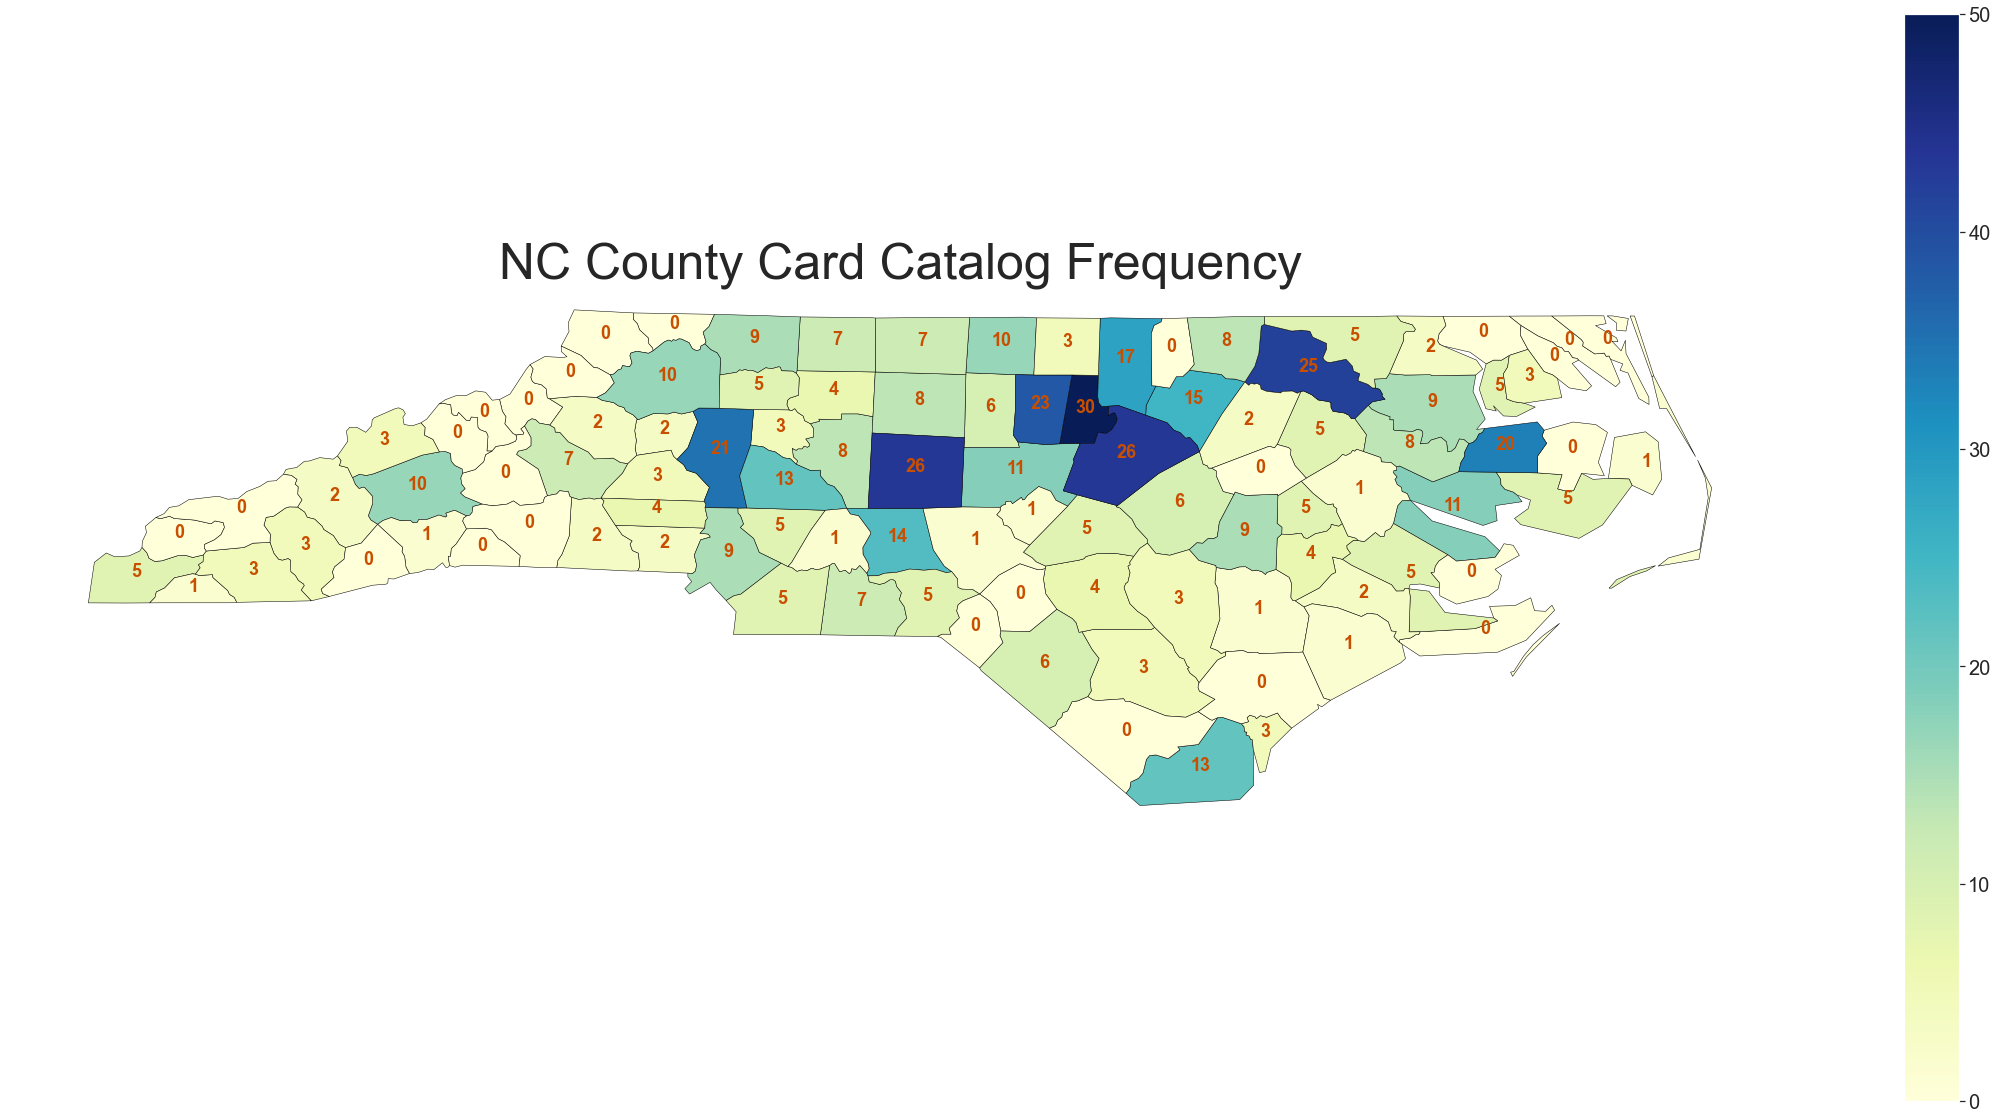

In [42]:
# Print nc county heatmap---code adapted from article linked above
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title("NC County Card Catalog Frequency", fontdict={'fontsize': '50', 'fontweight' : '3'})

color = 'YlGnBu'
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=0, vmax=50))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

nc.plot('Count', cmap=color, linewidth=0.5, ax=ax, edgecolor="black", figsize=(40, 20))

# Add quantity labels, code adapted from https://stackoverflow.com/questions/38899190/geopandas-label-polygons
nc_nums = nc.copy()
nc_nums['coords'] = nc_nums['geometry'].apply(lambda x: x.centroid.coords[:])
nc_nums['coords'] = [coords[0] for coords in nc_nums['coords']]

for index, row in nc_nums.iterrows():
    plt.annotate(text=row['Count'], xy=row['coords'], horizontalalignment='center', color='#C84E00', 
                 fontsize=18, fontweight='bold')

When we add up all the county collection counts up, we get 540 cards cataloging collections that are specifically from North Carolina counties. It looks like there are a lot of cards from Durham County--which makes sense because the Rubenstein Library is located in it--as well as Washington County, along with the counties that border Durham. After checking for overlap, most of the cards with a county also have North Carolina or an abbreviation of the state. The question remains around why there are so many cards from Virginia. According to our word cloud, the civil war is a very common topic in the catalog, and as much of this was fought in Virginia, perhaps that could explain why there are so many cards from the non-NC state.

## International Country Counts

We've seen where the cards in the United States hail from, but what about the rest of the world? Let's see how many cards we have from other countries.

In [63]:
# Dictionary of non-US countries pre-1990

countries = {
    "Afghanistan": 0,
    "Albania": 0,
    "Algeria": 0,
    "Andorra": 0,
    "Angola": 0,
    "Antigua and Barbuda": 0,
    "Argentina": 0,
    "Australia": 0,
    "Austria": 0,
    "Bahamas": 0,
    "Bahrain": 0,
    "Bangladesh": 0,
    "Barbados": 0,
    "Belgium": 0,
    "Belize": 0,
    "Benin": 0,
    "Bhutan": 0,
    "Bolivia": 0,
    "Bosnia and Herzegovina": 0,
    "Botswana": 0,
    "Brazil": 0,
    "Brunei": 0,
    "Bulgaria": 0,
    "Burkina Faso": 0,
    "Burma": 0,
    "Burundi": 0,
    "Cabo Verde": 0,
    "Cambodia": 0,
    "Cameroon": 0,
    "Canada": 0,
    "Central African Republic": 0,
    "Chad": 0,
    "Chile": 0,
    "China": 0,
    "Colombia": 0,
    "Comoros": 0,
    "Democratic Republic of the Congo": 0,
    "Republic of the Congo": 0,
    "Costa Rica": 0,
    "Côte d’Ivoire": 0,
    "Croatia": 0,
    "Cuba": 0,
    "Cyprus": 0,
    "Czech Republic": 0,
    "Denmark": 0,
    "Djibouti": 0,
    "Dominica": 0,
    "Dominican Republic": 0,
    "Ecuador": 0,
    "Egypt": 0,
    "El Salvador": 0,
    "England": 0,
    "Equatorial Guinea": 0,
    "Eritrea": 0,
    "Eswatini": 0,
    "Ethiopia": 0,
    "Fiji": 0,
    "Finland": 0,
    "France": 0,
    "Gabon": 0,
    "Gambia": 0,
    "Germany": 0,
    "Ghana": 0,
    "Greece": 0,
    "Grenada": 0,
    "Guatemala": 0,
    "Guinea": 0,
    "Guinea-Bissau": 0,
    "Guyana": 0,
    "Haiti": 0,
    "Honduras": 0,
    "Hungary": 0,
    "Iceland": 0,
    "India": 0,
    "Indonesia": 0,
    "Iran": 0,
    "Iraq": 0,
    "Ireland": 0,
    "Israel": 0,
    "Italy": 0,
    "Jamaica": 0,
    "Japan": 0,
    "Jordan": 0,
    "Kenya": 0,
    "Kiribati": 0,
    "North Korea": 0,
    "South Korea": 0,
    "Kosovo": 0,
    "Kuwait": 0,
    "Laos": 0,
    "Lebanon": 0,
    "Lesotho": 0,
    "Liberia": 0,
    "Libya": 0,
    "Liechtenstein": 0,
    "Luxembourg": 0,
    "Madagascar": 0,
    "Malawi": 0,
    "Malaysia": 0,
    "Maldives": 0,
    "Mali": 0,
    "Malta": 0,
    "Marshall Islands": 0,
    "Mauritania": 0,
    "Mauritius": 0,
    "Mexico": 0,
    "Micronesia": 0,
    "Monaco": 0,
    "Mongolia": 0,
    "Montenegro": 0,
    "Morocco": 0,
    "Mozambique": 0,
    "Namibia": 0,
    "Nauru": 0,
    "Nepal": 0,
    "Netherlands": 0,
    "New Zealand": 0,
    "Nicaragua": 0,
    "Niger": 0,
    "Nigeria": 0,
    "North Macedonia": 0,
    "Norway": 0,
    "Oman": 0,
    "Pakistan": 0,
    "Palau": 0,
    "Panama": 0,
    "Papua New Guinea": 0,
    "Paraguay": 0,
    "Peru": 0,
    "Philippines": 0,
    "Poland": 0,
    "Portugal": 0,
    "Qatar": 0,
    "Romania": 0,
    "Rwanda": 0,
    "Saint Kitts and Nevis": 0,
    "Saint Lucia": 0,
    "Saint Vincent and the Grenadines": 0,
    "Samoa": 0,
    "San Marino": 0,
    "Sao Tome and Principe": 0,
    "Saudi Arabia": 0,
    "Scotland"
    "Senegal": 0,
    "Serbia": 0,
    "Seychelles": 0,
    "Sierra Leone": 0,
    "Singapore": 0,
    "Slovakia": 0,
    "Slovenia": 0,
    "Solomon Islands": 0,
    "Somalia": 0,
    "South Africa": 0,
    "Spain": 0,
    "Sri Lanka": 0,
    "Sudan": 0,
    "Sudan, South": 0,
    "Suriname": 0,
    "Sweden": 0,
    "Switzerland": 0,
    "Syria": 0,
    "Taiwan": 0,
    "Tanzania": 0,
    "Thailand": 0,
    "Timor-Leste": 0,
    "Togo": 0,
    "Tonga": 0,
    "Trinidad and Tobago": 0,
    "Tunisia": 0,
    "Turkey": 0,
    "Tuvalu": 0,
    "Uganda": 0,
    "United Arab Emirates": 0,
    "United Kingdom": 0,
    "Uruguay": 0,
    "Vanuatu": 0,
    "Vatican City": 0,
    "Venezuela": 0,
    "Vietnam": 0,
    "Wales": 0,
    "Yemen": 0,
    "Zambia": 0,
    "Zimbabwe": 0,
}

In [64]:
# Collect country card counts
# Function to check if location is a country and add to counts
def find_country(c):
    # Check in list of countries
    for key in countries:
        if c.strip(".") == key:
            countries[key] = countries.get(key) + 1
            continue
    
# Loop through each main entry and try to gather location
for index, row in df.iterrows():
    if row['Coll_head'] == 1:
        # Try to get county name
        locs = str(row['Loc']).split(",")
        if len(locs) < 1:
            continue
        else:
            for i in range(0, len(locs)):
                find_country(locs[i])

In [90]:
for country in countries:
    if countries.get(country) > 0:
        print(country, countries.get(country))

Australia 1
Austria 3
Belgium 1
Brazil 8
Canada 1
Chile 1
China 5
Colombia 1
Cuba 4
Denmark 4
Egypt 3
England 63
Fiji 1
France 47
Germany 30
Greece 3
Grenada 2
Guatemala 1
India 25
Indonesia 1
Iran 1
Ireland 4
Israel 2
Italy 3
Jamaica 3
Japan 9
Jordan 13
Lebanon 2
Liberia 1
Madagascar 1
Malta 2
Mexico 8
Morocco 1
New Zealand 1
Peru 5
Philippines 3
Poland 4
San Marino 1
South Africa 4
Spain 22
Suriname 1
Sweden 2
Switzerland 5
Syria 1
Thailand 1
Tunisia 1
Turkey 3
Vietnam 3
Wales 2


Looks like we have cards from several different countries, mainly from Europe, but we also have a few from South America, Africa, Asia, and Oceania. We have a total of **314 cards from non-USA countries**. Let's visualize how they are distributed.

In [66]:
continents = {
    "Europe": 196,
    "Asia": 69,
    "North America": 19,
    "South America": 16,
    "Africa": 11,
    "Oceania": 3
}

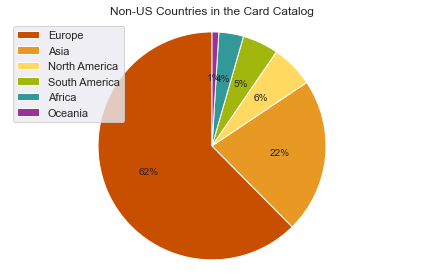

In [87]:
colors = ['#C84E00', '#E89923', '#FFD960', '#A1B70D', '#339898', '#993399']

plt.pie(continents.values(), autopct='%1.0f%%', startangle = 90, colors=colors)
plt.legend(continents.keys())
plt.axis('equal')
plt.title("Non-US Countries in the Card Catalog")
plt.tight_layout()
plt.show()

## TODO: Explore Frequent Non-N.C. States

## TODO: Qualitative Analysis of Outliers

In [ ]:
## Word cloud by state?